<a href="https://colab.research.google.com/github/maryawamaitha/ML-Project-2/blob/main/Copy_of_HeartDiseaseLogistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 
- This is Heart Disease dataset is from Kaggle 
Heart Disease is one of the leading cause of death in both developed and developing countries. 
- The aim of this analysis is to identify whether certain factors overall contribute to the risk of coronary heart disease. 

- The data consists of various risk factors:
Sex, Age, Current smoker, Cigs per day [behavioral] and Historical and Current medical conditions.

- This is a classification problem.

- The goal is to use logistic regression to predict whether a patient based of the risk factors has a 10-year risk of developing coronary heart disease(CHD)

-The target: 10-year CHD represent('yes'-1, 'No'-0)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn import metrics

In [ ]:
df=pd.read_csv('/content/framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4238, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


The dataset has integers and floats datatypes - no transformers required

- since there are missing values
- Data Cleaning would be done
- Data visualization - to identify any relationships between the variables
- Modelling - Perform KNN model, decision tree model to compare the classification metrics

In [ ]:
df.duplicated().sum()

0

There are missing values in the datasets.Showing the columns with missing values

In [ ]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

Since the missing data is less than 5% of the total data, I will drop the missing value rows

In [ ]:
df.dropna(inplace =True)

In [ ]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Looking at the numerical columns

In [ ]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Checking for outliers

[Text(0, 0, 'male'),
 Text(0, 0, 'age'),
 Text(0, 0, 'currentSmoker'),
 Text(0, 0, 'cigsPerDay'),
 Text(0, 0, 'BPMeds'),
 Text(0, 0, 'prevalentStroke'),
 Text(0, 0, 'prevalentHyp'),
 Text(0, 0, 'diabetes'),
 Text(0, 0, 'totChol'),
 Text(0, 0, 'sysBP'),
 Text(0, 0, 'diaBP'),
 Text(0, 0, 'BMI'),
 Text(0, 0, 'heartRate'),
 Text(0, 0, 'glucose'),
 Text(0, 0, 'TenYearCHD')]

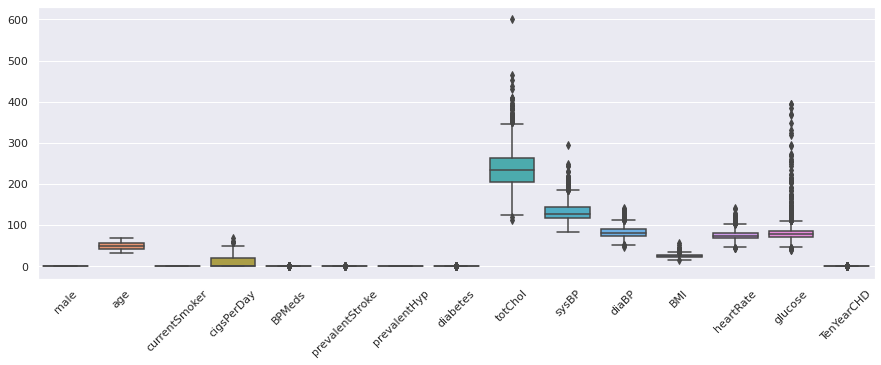

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

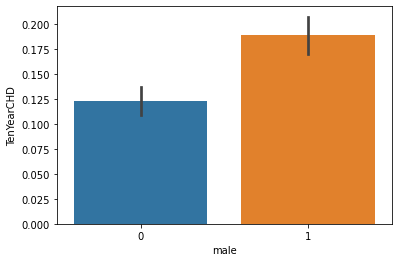

In [ ]:
sns.barplot(data=df,y='TenYearCHD',x='male')

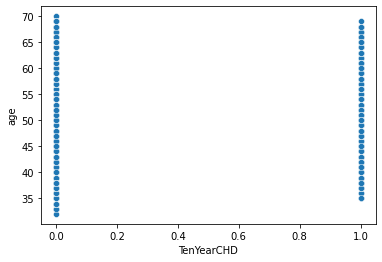

In [ ]:
sns.scatterplot(data=df,x='TenYearCHD',y='age')

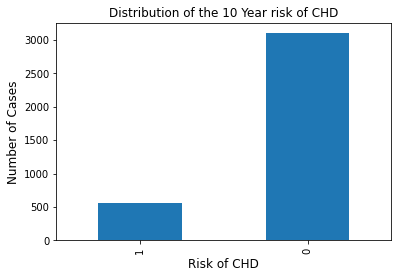

In [ ]:
df['TenYearCHD'].value_counts().sort_values().plot(kind = 'bar');
plt.title('Distribution of the 10 Year risk of CHD');
plt.ylabel('Number of Cases', fontsize=12);
plt.xlabel('Risk of CHD', fontsize=12);

There are no outliers in the columns

In [ ]:
std_corr = df.corr()
print(std_corr['TenYearCHD'].sort_values(ascending = False))

TenYearCHD         1.000000
age                0.233810
sysBP              0.222885
prevalentHyp       0.181556
diaBP              0.150342
glucose            0.121942
diabetes           0.093397
male               0.091745
totChol            0.091127
BPMeds             0.089116
BMI                0.081931
cigsPerDay         0.052159
prevalentStroke    0.048351
heartRate          0.020523
currentSmoker      0.019176
education         -0.063068
Name: TenYearCHD, dtype: float64


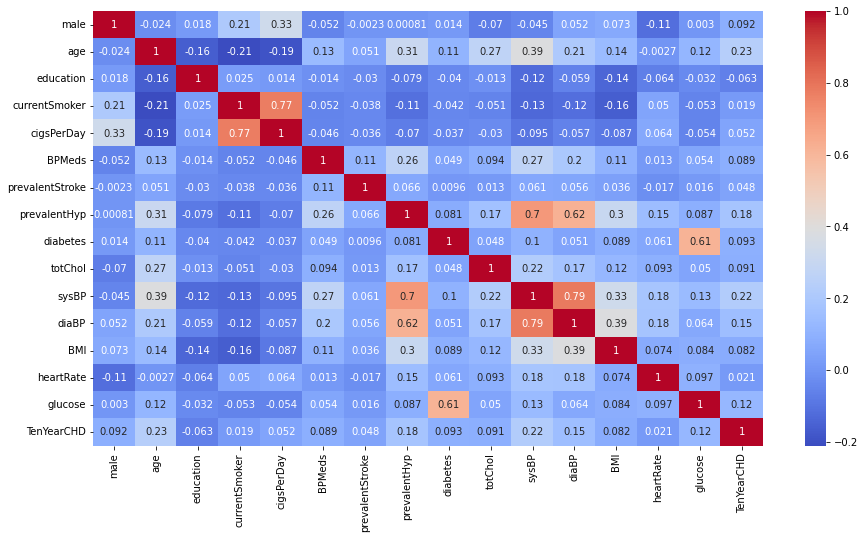

In [ ]:
df= df.drop(columns=['education'])
plt.figure(figsize=[15,8])
sns.heatmap(std_corr,annot = True, cmap = 'coolwarm');

Based on the heatmap, there is a correlation between the cigs per Day and current Smoker
- Relationship between glucose and diabetes; 
- Relationship between sysBP and dialBP

- The education column has no correlation with the other features and will be dropped.